# Proyek Analisis Data: [Input Nama Dataset]
- Name: Ahmad Rasidin Ridjaalunnaim Nurfan
- Email: ra.rasidin07@gmail.com
- ID Dicoding: ahmadras

## Menentukan Pertanyaan Bisnis

Dalam Penganalisa data, hal yang harus dilakuakan ialah memberi pertanyaan yang bersifat spesifik, measurable, action oriented, relevant dan time-bound. Ini dilakukan agar mendapat jawaban terbaik dari permsalahan yang dihadapi serta memberi insight yang bersifat jelas.

- Apakah terdapat pola musiman yang signifikan antara jumlah penyewa kasual (casual) dan jumlah penyewa terdaftar (registered)?
- Bagaimana hubungan antara suhu (temp) dan jumlah penyewa kasual (casual) dibandingkan dengan penyewa terdaftar (registered)?

Dari dua pertanyaan diatas, yang ingin dipahamkan ialah korelasi antara musim, suhu dan jumlah penyewa sepeda apakah berdampak atau tidak.

## Import Semua Packages/Library yang Digunakan

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar

## Data Wrangling

### Gathering Data

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/SDN2003/bike-share-dataset-data-analyse_Ahmad_Rasidn/refs/heads/main/dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**

- Glosarium dari data diatas

| **Field**       | **Tipe Data** | **Deskripsi**                                                                 |
|------------------|--------------|-------------------------------------------------------------------------------|
| `instant`       | Integer      | Indeks unik untuk setiap catatan (record index).                              |
| `dteday`        | Date         | Tanggal data dicatat (format: YYYY-MM-DD).                                    |
| `season`        | Integer      | Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).        |
| `yr`            | Integer      | Tahun data dicatat (0: 2011, 1: 2012).                                        |
| `mnth`          | Integer      | Bulan data dicatat (1: Januari, 12: Desember).                                |
| `hr`            | Integer      | Jam data dicatat (0: 12 AM, 23: 11 PM).                                       |
| `holiday`       | Integer      | Apakah hari libur (0: Tidak, 1: Ya).                                          |
| `weekday`       | Integer      | Hari dalam seminggu (0: Minggu, ..., 6: Sabtu).                               |
| `workingday`    | Integer      | Apakah hari kerja (1: Ya, 0: Tidak - akhir pekan atau hari libur).            |
| `weathersit`    | Integer      | Situasi cuaca (1: Cerah, 2: Berawan/Mendung, 3: Hujan Ringan, 4: Hujan Lebat).|
| `temp`          | Float        | Suhu rata-rata (dinormalisasi ke [0, 1], dibagi dengan 41°C).                 |
| `atemp`         | Float        | Suhu yang dirasakan rata-rata (dinormalisasi ke [0, 1], dibagi dengan 50°C).  |
| `hum`           | Float        | Kelembapan rata-rata (dinormalisasi ke [0, 1], dibagi dengan 100%).           |
| `windspeed`     | Float        | Kecepatan angin rata-rata (dinormalisasi ke [0, 1], dibagi dengan 67).        |
| `casual`        | Integer      | Jumlah pengguna tidak terdaftar (casual).                                     |
| `registered`    | Integer      | Jumlah pengguna terdaftar (registered).                                       |
| `cnt`           | Integer      | Total jumlah perentalan sepeda (casual + registered).                          |

### Assessing Data

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [35]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [36]:
jumlah_duplikasi = df.duplicated().sum()

# Kondisional untuk memeriksa apakah ada data terduplikasi
if jumlah_duplikasi > 0:
    print("Terdapat nilai data terduplikasi ;)")
    print("Jumlah duplikasi: ", jumlah_duplikasi)
else:
    print("Tidak ada nilai data terduplikasi 👍👍👍 ")
    print("Jumlah duplikasi: ", jumlah_duplikasi)

Tidak ada nilai data terduplikasi 👍👍👍 
Jumlah duplikasi:  0


In [37]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

Dataset ini terdiri dari 17 kolom dan 17.379

- #### 1. Kualitas Data

Tidak ada missing value di semua kolom dan tidak ada data duplikat

- #### 2. Statistik Deskriptif

Jumlah total penrentalan sepeda memiliki rata-rata 189 perentalan per jam, dengan nilai minimum 1 dan maksimum 977, menunjukkan distribusi yang positively skewed (miring ke kanan). Perentalan didominasi oleh pengguna terdaftar (registered) dengan rata-rata 153.8 perentalan, sementara pengguna tidak terdaftar (casual) memiliki rata-rata hanya 35.7 perentalan.



### Cleaning Data

#### 3.1. Proses Cleaning Data

In [38]:
df['dteday'] = pd.to_datetime(df['dteday']) 

<Axes: xlabel='cnt'>

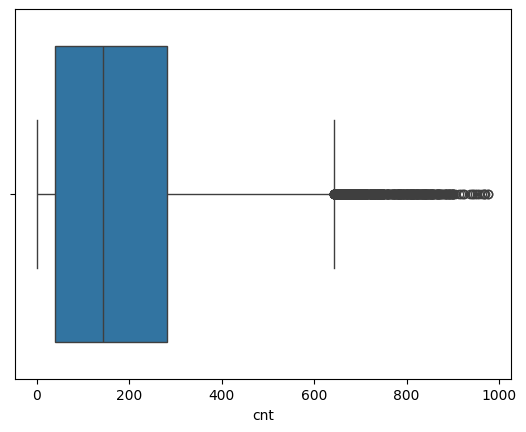

In [39]:
sns.boxplot(x=df['cnt'])

In [40]:
df['weekday'] = df['weekday'].map({i: calendar.day_name[i] for i in range(7)})

season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
yr_mapping = {0: 2011, 1: 2012}
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
weathersit_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Snow',
    4: 'Heavy Rain'
}

# Apply mappings
df['season'] = df['season'].map(season_mapping)
df['yr'] = df['yr'].map(yr_mapping)
df['mnth'] = df['mnth'].map(month_mapping)
df['weathersit'] = df['weathersit'].map(weathersit_mapping)

df['temp'] = df['temp']*41
df['atemp'] = df['atemp']*50
df['hum'] = df['hum']*100
df['windspeed'] = df['windspeed']*67

#### 3.2. Pengecekan Terakhir

In [41]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [43]:
df.to_csv("Dashboard/new_bikeshare_data.csv", index=False)

**Insight:**

- Transformasi Kolom:

Kolom dteday berhasil diubah menjadi format datetime64[ns], sehingga dapat digunakan untuk analisis berbasis waktu. Kolom season, yr, mnth, dan weathersit telah dipetakan menjadi nilai deskriptif, seperti nama musim, bulan, tahun, dan situasi cuaca. Hal ini membuat data lebih mudah dipahami dan dianalisis. Kolom suhu (temp dan atemp) serta kelembapan (hum) telah dikonversi kembali ke nilai asli (bukan dalam skala [0,1]), yang mempermudah interpretasi.

- Penyimpanan Data

 Dataset yang telah dibersihkan telah disimpan dengan nama new_bikeshare_data.csv tanpa indeks, sehingga hanya data yang relevan yang disertakan dalam file CSV.

## Exploratory Data Analysis (EDA)

### Explore ...

In [44]:
bikeshare_data = pd.read_csv("https://raw.githubusercontent.com/SDN2003/bike-share-dataset-data-analyse_Ahmad_Rasidn/refs/heads/main/dashboard/cleaned_bikeshare_hour.csv")

# Display the first few rows
bikeshare_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [45]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,May,NaN,NaN,Sunday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


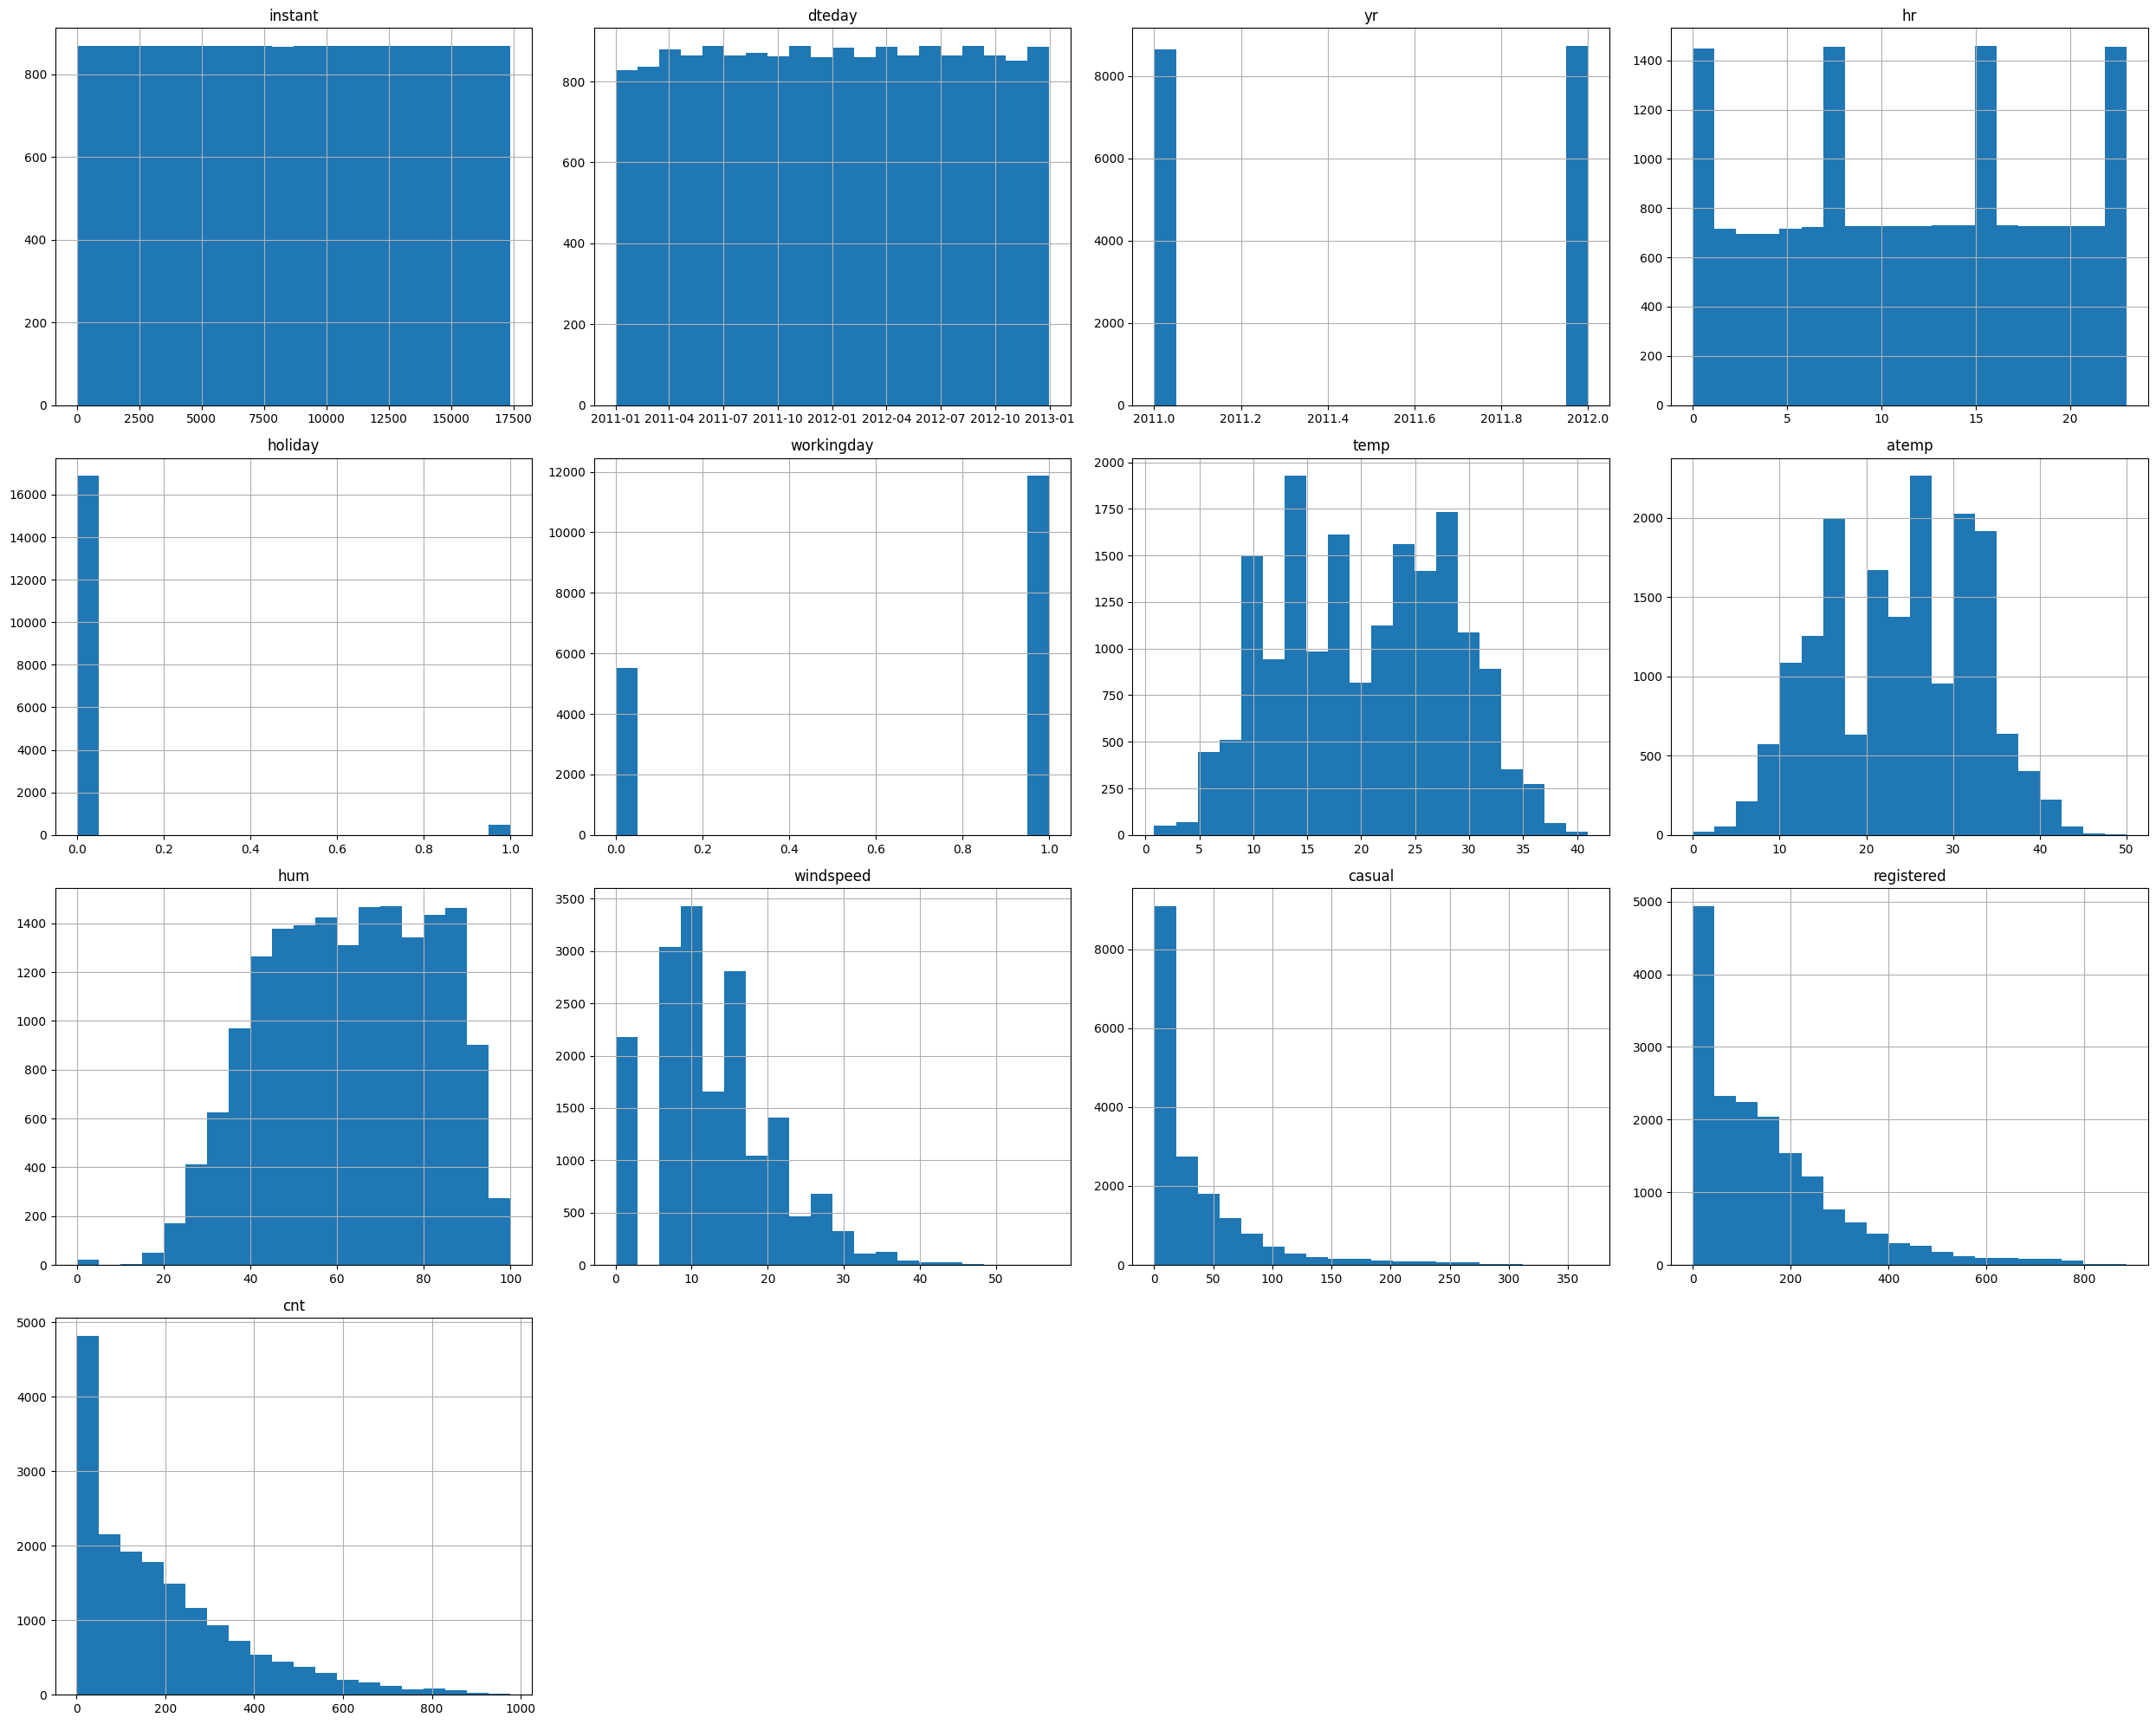

In [46]:
df.hist(figsize=(25, 20), bins=20)  
plt.tight_layout() 
plt.show()

In [47]:
df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234
casual,0.158295,0.142779,0.301202,0.031564,-0.300942,0.459616,0.454080,-0.347028,0.090287,1.000000,0.506618,0.694564


**Insight:**

- Dataset mencakup periode antara Januari 2011 hingga Desember 2012. Data ini mencatat penggunaan sepeda setiap jam. Musim terpopuler adalah musim gugur ("Fall"), diikuti oleh musim panas dan musim semi. Musim dingin memiliki frekuensi penggunaan yang lebih rendah. Bulan yang paling banyak tercatat adalah Mei, sementara Desember memiliki sedikit data. Hari Minggu memiliki frekuensi penggunaan sepeda tertinggi, diikuti oleh hari kerja. Suhu rata-rata sekitar 20°C dengan rentang 0 - 41°C. Ada korelasi yang kuat antara suhu (temp) dan suhu atmosfer (atemp) dengan nilai koefisien korelasi 0.99. Kelembaban udara rata-rata sekitar 63%, dan kecepatan angin berkisar antara 0 hingga 56 km/jam, dengan sebagian besar data berada di kisaran kecepatan rendah. Pengguna yang terdaftar (registered) lebih sering melakukan perentalan sepeda dibandingkan pengguna yang tidak terdaftar (casual), dengan rata-rata sekitar 153 untuk registered, dibandingkan 35 untuk casual.

- Suhu (temp) dan suhu atmosfer (atemp) memiliki korelasi yang sangat tinggi (0.99), artinya keduanya berhubungan erat dalam mempengaruhi perentalan sepeda. Suhu yang lebih tinggi cenderung menghasilkan jumlah perentalan yang lebih banyak, dengan korelasi yang cukup signifikan antara suhu (temp) dan total perentalan (cnt) sebesar 0.40. Kelembaban (hum) dan angin (windspeed) memiliki korelasi negatif dengan jumlah perentalan, yang berarti ketika kelembaban tinggi atau kecepatan angin meningkat, jumlah perentalan cenderung menurun.



## Visualization & Explanatory Analysis

In [53]:
bikeshare_data = pd.read_csv("https://raw.githubusercontent.com/SDN2003/bike-share-dataset-data-analyse_Ahmad_Rasidn/refs/heads/main/dashboard/new_bikeshare_data.csv")

# Display the first few rows
bikeshare_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


### Pertanyaan 1:

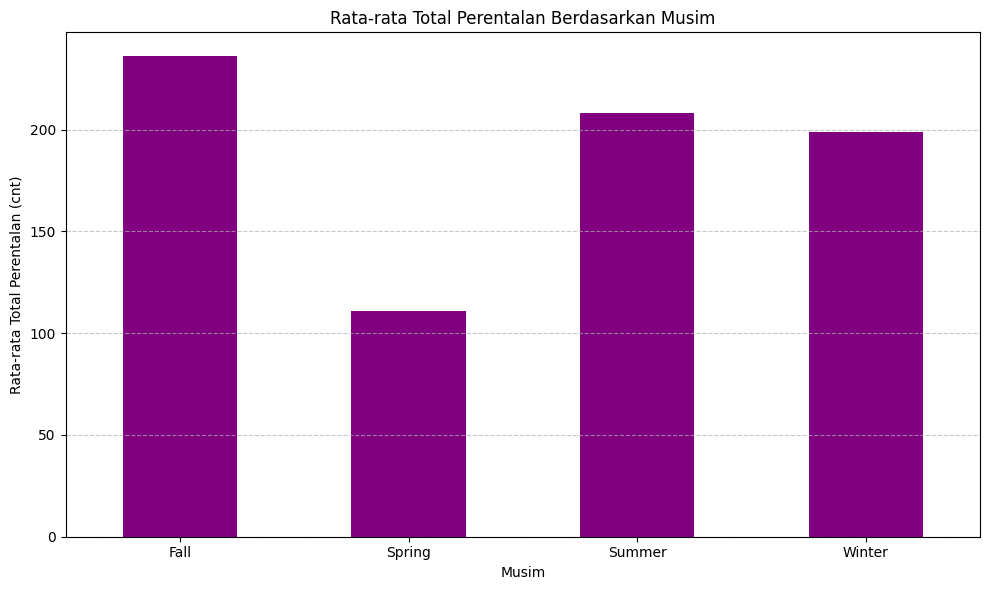

In [54]:
plt.figure(figsize=(10, 6))
seasonal_cnt_data = bikeshare_data.groupby('season')['cnt'].mean()
seasonal_cnt_data.plot(kind='bar', color='purple', rot=0)
plt.title('Rata-rata Total Perentalan Berdasarkan Musim')
plt.ylabel('Rata-rata Total Perentalan (cnt)')
plt.xlabel('Musim')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_21680\3098311049.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_data = bikeshare_data.groupby('season')[['casual', 'registered']].mean()


<Figure size 1000x600 with 0 Axes>

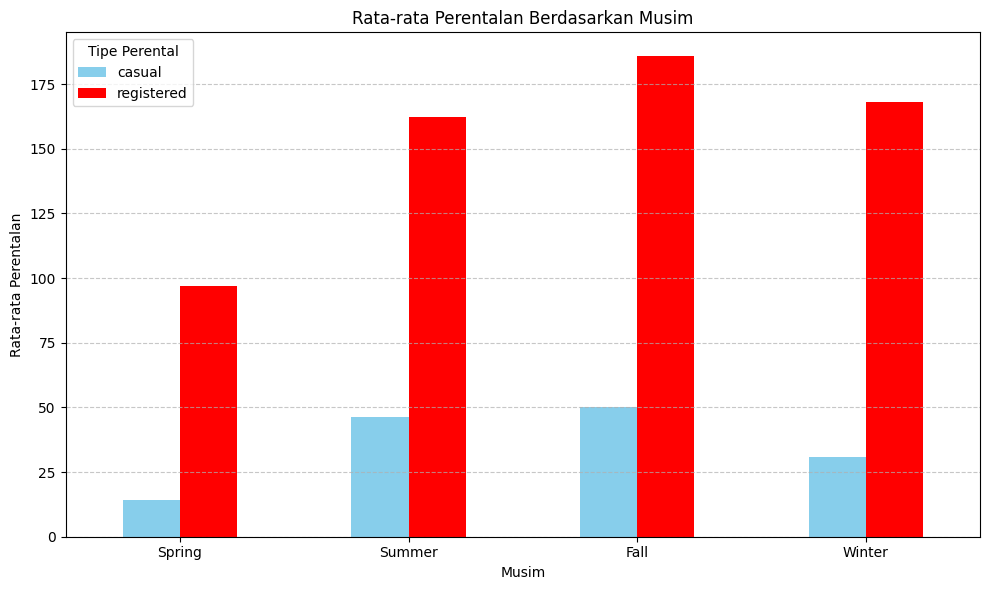

In [55]:
season_order = ['Spring', 'Summer', 'Fall', 'Winter']

# Ensure the season column is categorical with the correct order
bikeshare_data['season'] = pd.Categorical(bikeshare_data['season'], categories=season_order, ordered=True)

# Re-aggregate data by season with the correct order
seasonal_data = bikeshare_data.groupby('season')[['casual', 'registered']].mean()

# Plot seasonal patterns with corrected order
plt.figure(figsize=(10, 6))
seasonal_data.plot(kind='bar', figsize=(10, 6), rot=0, color=['skyblue', 'red'])
plt.title('Rata-rata Perentalan Berdasarkan Musim')
plt.ylabel('Rata-rata Perentalan')
plt.xlabel('Musim')
plt.legend(title='Tipe Perental')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Pertanyaan 2:

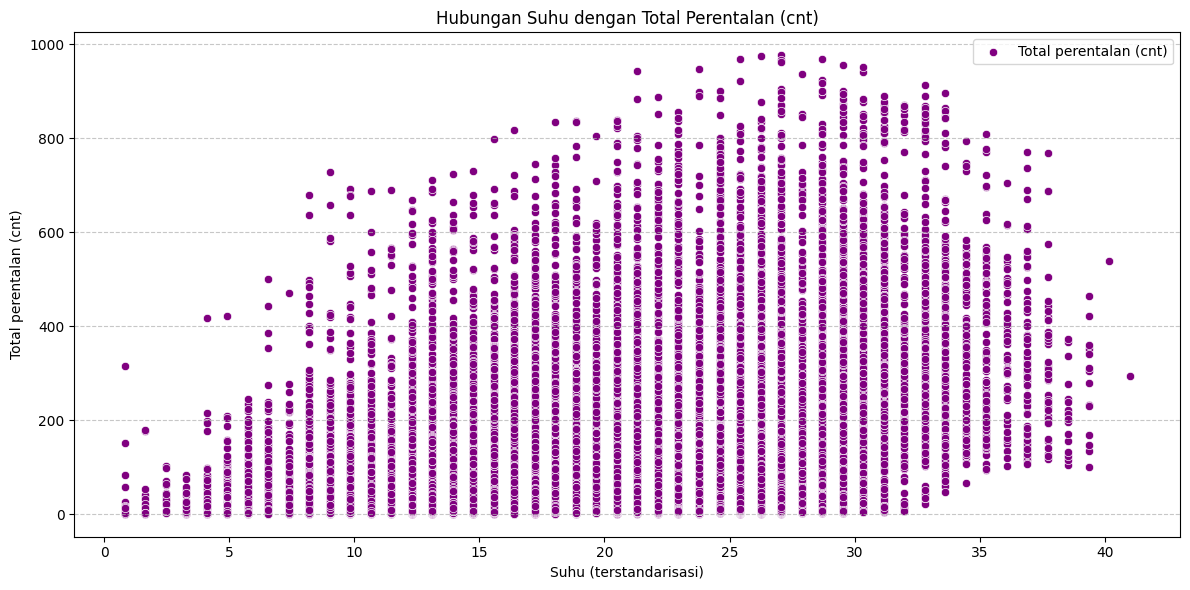

In [56]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bikeshare_data, x='temp', y='cnt', color='purple', label='Total perentalan (cnt)')
plt.title('Hubungan Suhu dengan Total Perentalan (cnt)')
plt.xlabel('Suhu (terstandarisasi)')
plt.ylabel('Total perentalan (cnt)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

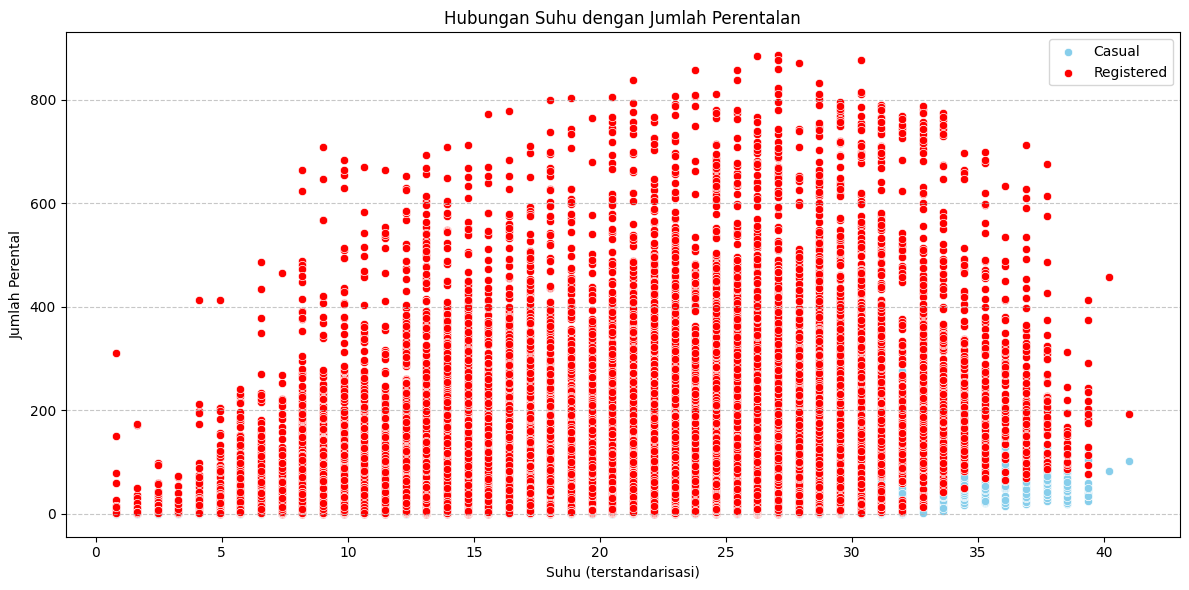

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=bikeshare_data, x='temp', y='casual', color='skyblue', label='Casual')
sns.scatterplot(data=bikeshare_data, x='temp', y='registered', color='red', label='Registered')
plt.title('Hubungan Suhu dengan Jumlah Perentalan')
plt.xlabel('Suhu (terstandarisasi)')
plt.ylabel('Jumlah Perental')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**

- 1. Apakah terdapat pola musiman yang signifikan antara jumlah perental kasual (casual) dan jumlah perental terdaftar (registered)?

Dari chart pertama, grafik ungu menunjukkan total dari semua pengguna Pertama kita lihat dari chart pertama, 

- Musim Fall (Gugur) memiliki jumlah perentalan tertinggi dibandingkan musim lainnya, dengan rata-rata sekitar 230 perentalan.

- Musim Summer (Panas) juga memiliki tingkat perentalan yang tinggi, mendekati angka 210.

- Musim Winter (Dingin) menunjukkan penurunan jumlah perentalan, tetapi angkanya masih cukup signifikan, sekitar 200 perentalan. 

- Musim Spring (Semi) memiliki jumlah perentalan terendah, dengan rata-rata sekitar 110.


**Total perentalan sepeda turun di signifikan pada musim semi dan musim dingin dibandingkan musim gugur. Bisa kita beri kesimpulan bahwa pengguna perentalan sepeda lebih memilih melakukan perentalan pada musim yang lebih hangat dan nyaman.**

Pernyataan diatas belum menjawab, pertanyaan diatas maka dilanjutkan dengan melihat dari chart kedua,

- Spring (Musim Semi):

Perental kasual memiliki jumlah terendah dibanding musim lainnya (sekitar 15).

Perental terdaftar juga rendah, tetapi lebih tinggi dibanding penyewa kasual (sekitar 100).

- Summer (Musim Panas):

Perental kasual meningkat signifikan (~45), tertinggi dibandingkan musim lainnya.

Perental terdaftar juga mengalami peningkatan drastis (~160).

- Fall (Musim Gugur):

Perental kasual tetap tinggi (~50), bahkan sedikit lebih tinggi dibanding musim panas.

Perental terdaftar mencapai puncaknya di musim ini (~180).

- Winter (Musim Dingin):

Perental kasual turun signifikan (~30).

Perental terdaftar juga mengalami penurunan (~170) tetapi masih tetap tinggi.

**Pada chart kedua penrentalan kasual cenderung lebih banyak melakukan perentalan selama musim panas (Summer) dan musim gugur (Fall), menunjukkan bahwa cuaca hangat mendorong perental sepeda oleh pengguna kasual dan pada chart penyewa terdaftar menunjukkan pola yang lebih konsisten sepanjang musim, meskipun sedikit meningkat di musim panas dan menurun di musim dingin (Winter).**

- 2. Bagaimana hubungan antara suhu (temp) dan jumlah perental kasual (casual) dibandingkan dengan perental terdaftar (registered)?

Kita lihat dari scatter plot pertama, 

Dari scatter plot diatas, titik titik ungu tersebut melambangkan pengguna. Berdasarkan scatter plot diatas pada suhu rendah (sekitar 0–10 °C), jumlah penyewa cukup sedikit, dengan sebagian besar titik di bawah 400 pengguna. Seiring dengan meningkatnya suhu (sekitar 15–30 °C), jumlah perentalan bertambah signifikan, dengan banyak titik mendekati 900–1000 pengguna. Pada suhu ekstrem (di atas 35 °C) jumlah perentalan turun signifikan, berada di rentang 100–300 pengguna. 

**Sehingga dapat disimpulkan bahwa pengguna lebih memilih merental pada suhu yang nyaman sekita (sekitar 15–30 °C)**

Pernyataan diatas belum menjawab, pertanyaan diatas maka dilanjutkan dengan melihat dari scatter plot kedua,

Berdasarkan scatter plot diatas, titik untuk menunjukkan pengguna terdaftar ditunjukkan berwarna merah sementara biru untuk pengguna kasual

- Tren Pengguna Terdaftar (Registered)
Berdasarkan scatter plot diatas, Jumlah mereka secara umum lebih tinggi dibandingkan perental kasual pada berbagai tingkat suhu. Pada suhu di atas 35 (panas tinggi), jumlah perental terdaftar mulai menurun. Hal ini bisa disebabkan oleh kenyamanan yang berkurang pada suhu ekstrem.

- Tren Pengguna Kasual (Casual)
Secara umum, jumlah mereka jauh lebih sedikit dibandingkan perental terdaftar. Tidak terlihat peningkatan signifikan pada jumlah penrental kasual seiring naiknya suhu. Grafik memperlihatkan titik-titik yang lebih tersebar dengan jumlah yang lebih rendah. Pada suhu sekitar 20-30 °C, terlihat sedikit peningkatan jumlah penyewa kasual, namun tidak sekuat tren penyewa terdaftar.

Dari responsivitas terhadap suhu. Pengguna terdaftar mungkin memiliki rutinitas yang lebih konsisten dalam menggunakan layanan sewa, sementara pengguna kasual lebih dipengaruhi oleh faktor kenyamanan, seperti suhu.

**Ini menunjukkan bahwa layanan sewa lebih sering digunakan oleh pengguna terdaftar yang kurang responsif terhadap perubahan suhu, sedangkan penyewa kasual lebih dipengaruhi oleh suhu.**

## Conclusion

- Conclution pertanyaan 1

Faktor musim sangat berdampak jauh lebih besar terhadap pengguna kasual dibandingkan pengguna terdaftar, walau demikian dalam segi bisnis kita bisa membuka lapak untuk perentalan sepeda pada musim panas dan gugur dikarenakan cuaca yang hangat dapat meningkatkan efektifitas dan bisnis terhadap lapak

- Conclution pertanyaan 2

Faktor suhu juga dapat berdampak terhadap pembisnis yang membuka usaha pada suhu yang lebih hangat (15–30 °C) dikarenakan kenaikan signifikan terhadap pengguna kasual, walau begitu pengguna terdaftar tidak terdampak pada kenaikan suhu dan menunjukkan konsistensi dari suhu rendah sampai suhu ekstrim.